In [2]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Loading the dataset 
df = pd.read_csv(r"C:\Users\manik\OneDrive\Desktop\Elevate labs tasks\datasets\heart.csv") 
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Feature and target split
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



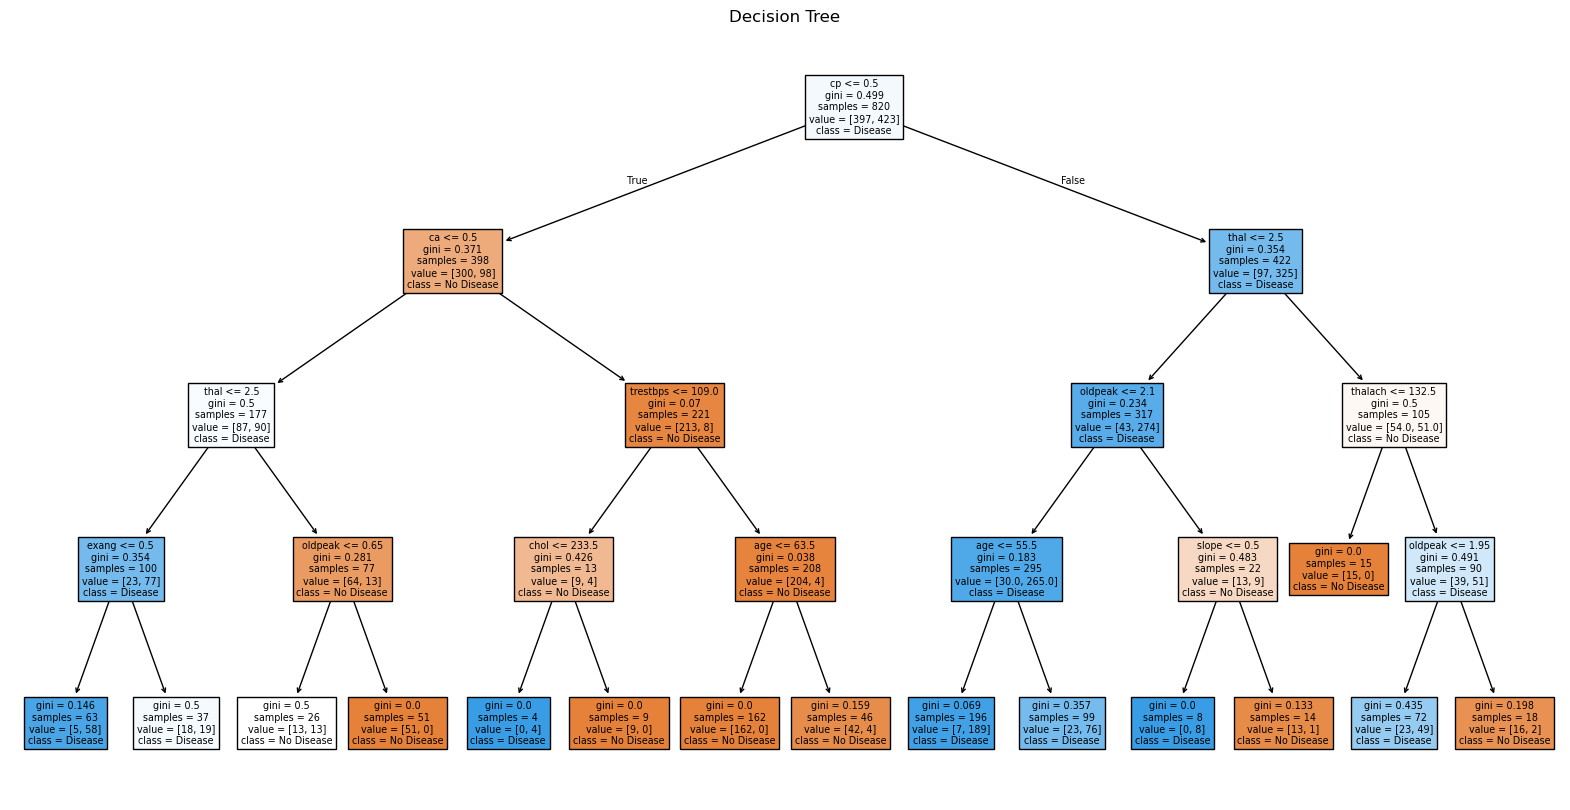

In [7]:
dt = DecisionTreeClassifier(max_depth=4,random_state=42)
dt.fit(X_train, y_train)
# Visualization
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns,class_names=['No Disease', 'Disease'],filled=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
#Evaluate
y_pred_dt = dt.predict(X_test)
print("Decision tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Confusion Matrix:
[[71 31]
 [10 93]]


In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



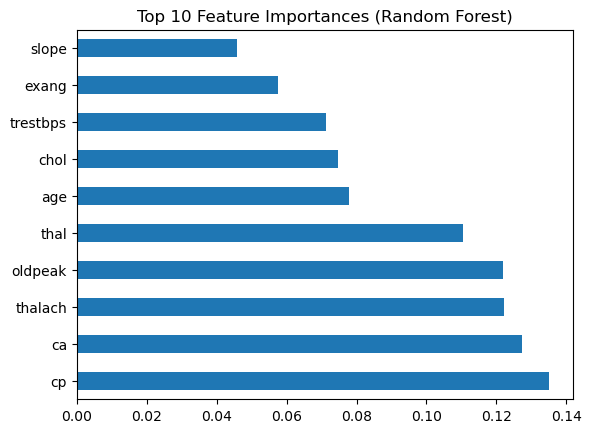

In [12]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [ ]:
cv_score = cross_val_score(rf, X, y, cv=5)
print("Random Forest accuracy:", np.mean(cv_score))

Random Forest Cross-Validation Accuracy: 0.9970731707317073
